In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from FRED_data_pull import *
from pathlib import Path
from datetime import datetime, timedelta
import os
import dotenv
dotenv.load_dotenv()
api_key = os.environ['FRED_API_KEY']
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Obtain and Clean Data

In [2]:
data_raw = pull_data([#'PPIFIS',
                      'CPIAUCSL',
                      'CPILFESL',
                      'PCEPILFE',
                      'PCEPI',
                      'UNRATE',
                      'GASREGW',
                      'DCOILWTICO',
                      'DTWEXBGS',
                      'EXPINF2YR',
                      'IR'
                    ],
                 'm', api_key)

data_raw = data_raw[::-1]

C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.stlouisfed.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.stlouisfed.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.stlouisfed.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1

In [3]:
ppi = pull_data(['PPIFIS'],
                 'm', api_key)
core_ppi = pull_data(['PPIFES'],
                 'm', api_key)
cpi = pull_data(['CPIAUCSL'],
                 'm', api_key)
core_cpi = pull_data(['CPILFESL'],
                 'm', api_key)
pce = pull_data(['PCEPI'],
                 'm', api_key)
core_pce = pull_data(['PCEPILFE'],
                 'm', api_key)
gasoline = pull_data(['GASREGW'],
                 'm', api_key)
crude = pull_data(['DCOILWTICO'],
                 'm', api_key)
#dollar = pull_data(['DTWEXBGS'],
#                 'm', api_key)
unemployment = pull_data(['UNRATE'],
                 'm', api_key)
import_prices = pull_data(['IR'],
                 'm', api_key)
core_import_prices = pull_data(['IR4'],
                 'm', api_key)
inflation_expectations = pull_data(['T5YIE'],
                 'm', api_key)

C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.stlouisfed.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.stlouisfed.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.stlouisfed.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1

In [117]:
#inflation_expectations = pull_data(['EXPINF2YR'],
#                 'm', api_key)

In [750]:
file_path = Path("ism_services_df.xlsx")
ism_services_df = pd.read_excel(file_path).set_index('date')
file_path = Path("ism_manufacturing_df.xlsx")
ism_manufacturing_df = pd.read_excel(file_path).set_index('date')
file_path = Path("dxy_df.xlsx")
dxy_df = pd.read_excel(file_path).set_index('date')
file_path = Path("philly_services_df.xlsx")
philly_services_df = pd.read_excel(file_path).set_index('date')
file_path = Path("philly_manufacturing_df.xlsx")
philly_manufacturing_df = pd.read_excel(file_path).set_index('date')
file_path = Path("empire_manufacturing_df.xlsx")
empire_manufacturing_df = pd.read_excel(file_path).set_index('date')
file_path = Path("nfib_prices_df.xlsx")
nfib_prices_df = pd.read_excel(file_path).set_index('date')
#file_path = Path("Adobe DPI.xlsx")
#adbe_df = pd.read_excel(file_path).set_index('date')

In [751]:
data_raw = pd.DataFrame()
#data_raw['DXY'] = dollar
data_raw['Gasoline'] = gasoline
data_raw['Crude'] = crude
data_raw['Unemployment'] = unemployment
data_raw['CPI'] = cpi
data_raw['Core CPI'] = core_cpi
data_raw['PCE'] = pce
data_raw['Core PCE'] = core_pce
#data_raw['Import Prices'] = import_prices
#data_raw['Core Import Prices'] = core_import_prices
#data_raw['PPI'] = ppi
#data_raw['Core PPI'] = core_ppi
data_raw['Expectations'] = inflation_expectations

data_raw['DXY'] = dxy_df

data_raw = data_raw[::-1]

In [752]:
data = (np.log(data_raw).diff()*100)[1:]
data['Unemployment'] = (data_raw['Unemployment'].diff()*100)[1:]
#data['EXPINF2YR'] = (data_raw['EXPINF2YR'].diff()*1200)[1:]
data['Expectations'] = (data_raw['Expectations'].diff()*100)[1:]

#data.iloc[-2,3] = np.nan
#data.iloc[-2,4] = np.nan
#data.iloc[-2,5] = np.nan
#data.iloc[-2,6] = np.nan
#data.iloc[-2,7] = np.nan
#data.iloc[-2,8] = np.nan
#data.iloc[-2,9] = np.nan

C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [753]:
data['ISM Services'] = ism_services_df 
data['ISM Manufacturing'] = ism_manufacturing_df 
#data['Empire Manufacturing'] = empire_manufacturing_df 
#data['Philly Services'] = philly_services_df 
#data['Philly Manufacturing'] = philly_manufacturing_df 
data['NFIB Prices'] = nfib_prices_df
#data['Adobe DPI'] = adbe_df*1200
#data['Philly Empire Average'] = (philly_manufacturing_df['philly_index'] + empire_manufacturing_df['empire_index']) / 2

In [754]:
data = data[data.index >= '2003-02-28']
#data = data[data.index >= '2011-03-31']
#data = data[data.index >= '2014-01-31']

In [755]:
#data = data[:-1]

In [756]:
## Seasonal Adjustment

# Decompose
#decomposition = sm.tsa.seasonal_decompose(data['Gasoline'], model='additive')

# Extract the components
#trend = decomposition.trend
#seasonal = decomposition.seasonal
#residual = decomposition.resid

# Seasonally adjust
#data['Gasoline'] = data['Gasoline'] - seasonal


In [757]:
# Decompose
#decomposition = sm.tsa.seasonal_decompose(data['Import Prices'], model='additive')

# Extract the components
#trend = decomposition.trend
#seasonal = decomposition.seasonal
#residual = decomposition.resid

# Seasonally adjust
#data['Import Prices'] = data['Import Prices'] - seasonal

In [758]:
data.tail()

,Gasoline,Crude,Unemployment,CPI,Core CPI,PCE,Core PCE,Expectations,DXY,ISM Services,ISM Manufacturing,NFIB Prices
date,,,,,,,,,,,,
2023-11-30,-8.517626,-9.742591,-10.0,0.160181,0.307501,-0.010717,0.089116,-6.0,-1.838006,57.6,49.9,34.0
2023-12-31,-5.705205,-7.745028,0.0,0.232827,0.274955,0.125235,0.152229,-12.0,-1.140626,56.7,45.2,32.0
2024-01-31,-1.900524,3.081380,0.0,0.304968,0.391622,0.376407,0.451165,9.0,0.347506,64.0,52.9,33.0
2024-02-29,4.358889,4.095685,20.0,0.441088,0.357776,0.332490,0.261142,10.0,0.693141,58.6,52.5,30.0
2024-03-31,6.449960,4.740224,NaN,NaN,NaN,NaN,NaN,6.0,-0.408268,NaN,55.8,NaN


## PCA (To Get K_Factor)

In [759]:
# Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.dropna())

n_components = 5  # Choose the number of components (dimensions) you want to reduce to
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

In [760]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)


Explained Variance Ratio: [0.44821156 0.17977111 0.09993207 0.07754236 0.06584673]


# Fit Model

In [786]:
factors = {'Gasoline': ['Global', 'Commodities and Inflation Expectations'],
           'Crude' : ['Global', 'Commodities and Inflation Expectations'],
           #'Import Prices' : ['Global', 'Total Inflation'],
           #'Core Import Prices' : ['Global', 'Core Inflation'],
           'Unemployment' : ['Global'],
           'CPI' : ['Global', 'Total Inflation'],
           'Core CPI' : ['Global', 'Core Inflation'],
           'PCE' : ['Global', 'Total Inflation'],
           'Core PCE' : ['Global', 'Core Inflation'],
           'Expectations' : ['Global', 'Commodities and Inflation Expectations'],
           'ISM Services' : ['Global', 'Diffusion Indicies'],
           'ISM Manufacturing' : ['Global', 'Diffusion Indicies'],
           'Philly Empire Average' : ['Global', 'Diffusion Indicies'],
           #'Philly Manufacturing' : ['Global', 'Diffusion Indicies'],
           #'Empire Manufacturing' : ['Global', 'Diffusion Indicies'],
           'NFIB Prices' : ['Global', 'Diffusion Indicies'],
           'DXY' : ['Global']}
factor_orders = {'Global': 3}
factor_multiplicities = {'Global': 3}

In [787]:
cutoff = 1
#const_pre = np.ones(len(data)-cutoff)
model = sm.tsa.DynamicFactorMQ(data[:-cutoff], factors=factors, factor_orders=3, factor_multiplicities=factor_multiplicities, freq = 'M')#, enforce_stationarity=False)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Model Specification: Dynamic Factor Model                         
===========================================================================================
Model:                Dynamic Factor Model   # of observed variables:                    12
                   + 7 factors in 5 blocks   # of factor blocks:                          5
                     + AR(1) idiosyncratic   Idiosyncratic disturbances:              AR(1)
Sample:                2003-02-28 00:00:00   Standardize variables:                    True
                     - 2024-02-29 00:00:00                                                 
                                                    Observed variables / factor loadings                                                   
===========================================================================================================================================
    Dep. variable   Global.1   Global.2   Global.3 Diffusion Indicies Commodities and Inflation Expectations Core Inflation Total Inflation
-------------------------------------------------------------------------------------------------------------------------------------------
         Gasoline      X          X          X                                          X                                                  
            Crude      X          X          X                                          X                                                  
     Unemployment      X          X          X                                                                                             
              CPI      X          X          X                                                                                     X       
         Core CPI      X          X          X                                                                     X                       
              PCE      X          X          X                                                                                     X       
         Core PCE      X          X          X                                                                     X                       
     Expectations      X          X          X                                          X                                                  
              DXY      X          X          X                                                                                             
     ISM Services      X          X          X             X                                                                               
ISM Manufacturing      X          X          X             X                                                                               
      NFIB Prices      X          X          X             X                                                                               
                  Factor blocks:                 
=================================================
                                 block      order
-------------------------------------------------
          Global.1, Global.2, Global.3          3
                    Diffusion Indicies          3
Commodities and Inflation Expectations          3
                        Core Inflation          3
                       Total Inflation          3
=================================================
"""

In [788]:
results = model.fit(maxiter=1000000, disp=100)

print(results.summary())

EM start iterations, llf=-2657.7
EM iteration 100, llf=-2394.1, convergence criterion=3.3041e-05
EM iteration 200, llf=-2390.4, convergence criterion=6.7833e-06
EM iteration 300, llf=-2389.3, convergence criterion=2.7973e-06
EM iteration 400, llf=-2388.8, convergence criterion=1.6694e-06
EM iteration 500, llf=-2388.5, convergence criterion=1.1667e-06
EM converged at iteration 550, llf=-2388.4, convergence criterion=9.9843e-07 < tolerance=1e-06
                               Dynamic Factor Results                              
Dep. Variable:     "Gasoline", and 11 more   No. Observations:                  253
Model:                Dynamic Factor Model   Log Likelihood               -2388.361
                   + 7 factors in 5 blocks   AIC                           5014.723
                     + AR(1) idiosyncratic   BIC                           5435.196
Date:                     Mon, 01 Apr 2024   HQIC                          5183.893
Time:                             13:15:14   EM 

In [789]:
results.save('inflation_model.pkl')

In [790]:
if cutoff > 1:
    results_appended = results.append(endog = data[-cutoff:-1])
else:
    results_appended = results

# Specify the number of steps ahead you want to forecast
steps_ahead = 3  # For example, forecasting 12 months ahead
const_forecast = np.ones(steps_ahead)
# Generate forecasts
forecasts = results_appended.forecast(steps=steps_ahead, exog=const_forecast)

# The 'forecasts' variable now contains the forecasted values for each variable for the next 12 months
print(forecasts)


            Gasoline     Crude  Unemployment       CPI  Core CPI       PCE  \
2024-03-31  2.302796  2.774360     -8.277805  0.313400  0.282820  0.254699   
2024-04-30  1.264745  0.986293     -0.345899  0.252185  0.226517  0.211976   
2024-05-31  0.026499 -0.778279      1.959732  0.210899  0.204657  0.184056   

            Core PCE  Expectations       DXY  ISM Services  ISM Manufacturing  \
2024-03-31  0.237804      3.448143  0.192770     59.755366          53.155954   
2024-04-30  0.195693      0.041299  0.146328     60.309666          53.648323   
2024-05-31  0.179061     -0.624911  0.179594     60.316357          53.420435   

            NFIB Prices  
2024-03-31    29.998399  
2024-04-30    29.575454  
2024-05-31    29.195475  


In [791]:
results_appended.get_prediction(start='2024-02-29', end='2024-04-30').summary_frame(5)

PCE,mean,mean_se,mean_ci_lower,mean_ci_upper
2024-02-29,0.321744,0.177013,-0.025196,0.668684
2024-03-31,0.254699,0.177013,-0.092241,0.601639
2024-04-30,0.211976,0.211640,-0.202831,0.626782


## Update Existing Forecasts

In [792]:
#start_date = str(data.index[-1])[:7]
#end_date = str(data.index[-1] + timedelta(32))[:7]
def get_news(data, results, lookback=1):
    start_date = data.index[-lookback]
    #print(start_date)
    end_date = start_date + relativedelta(months=lookback+1)
    end_date = datetime(end_date.year, end_date.month, 1) - timedelta(days=1)
    #print(results.summary())

    #const_post_plus1 = np.ones(len(data) + 1)
    news = results.news(data, start=start_date, end=end_date, freq ='M')
    return news

news = get_news(data, results_appended)

print(news.summary())

                                       News                                       
Model:                DynamicFactorMQ   Original sample:       2003-02-28 00:00:00
Date:                Mon, 01 Apr 2024                        - 2024-02-29 00:00:00
Time:                        13:15:15   Update through:        2024-03-31 00:00:00
                                        # of revisions:                          0
                                        # of new datapoints:                     5
                                      Impacts                                      
        impact date impacted variable estimate (prev) impact of news estimate (new)
-----------------------------------------------------------------------------------
2024-03-31 00:00:00               CPI            0.31           0.13           0.44
                NaT          Core CPI            0.28           0.01           0.29
                NaT          Core PCE            0.24           0.02           0.2

In [793]:
def update_forecast_data(forecast_df, news,length=3):
    if length < 3:
        length = 3
    
    new_df = forecast_df.copy()
    num_cols = len(new_df.columns)
    for i in range(1,length):
        for j in range(num_cols):
            revision_date = news.impacts.index[j*i][0]
            col_name = news.impacts.index[j*i][1]
            new_df.loc[revision_date, col_name] = news.impacts.iloc[j*i,4]
    return new_df

def combine_data(history_df, forecast_df):
    #print(data)
    num_cols = len(history_df.columns)
    if num_cols == len(forecast_df.columns):
        new_df = pd.concat([history_df, forecast_df[1:]])
        for i in range(num_cols):
            if np.isnan(history_df.iloc[-1,i]):
                new_df.iloc[-len(forecast_df),i] = forecast_df.iloc[0,i]
        return new_df
    else:
        raise ValueError()

new_forecasts = update_forecast_data(forecasts, news)
new_data = combine_data(data, new_forecasts)
new_data.tail(5)

,Gasoline,Crude,Unemployment,CPI,Core CPI,PCE,Core PCE,Expectations,DXY,ISM Services,ISM Manufacturing,NFIB Prices
2024-01-31,-1.900524,3.081380,0.000000,0.304968,0.391622,0.376407,0.451165,9.000000,0.347506,64.000000,52.900000,33.000000
2024-02-29,4.358889,4.095685,20.000000,0.441088,0.357776,0.332490,0.261142,10.000000,0.693141,58.600000,52.500000,30.000000
2024-03-31,6.449960,4.740224,-16.177732,0.443284,0.292632,0.344764,0.255313,6.000000,-0.408268,61.227078,55.800000,30.636251
2024-04-30,3.408297,0.986293,-0.345899,0.336383,0.226517,0.271389,0.210173,0.041299,-0.061061,62.017994,53.648323,29.575454
2024-05-31,0.026499,-0.778279,1.959732,0.210899,0.204657,0.184056,0.179061,-0.624911,0.179594,60.316357,53.420435,29.195475


## Recursive Estimation

In [769]:
def recursive_estimation(data, factors = 1, factor_orders = 3, factor_multiplicities = 1, steps_ahead = 2, start_point = 50, missing_var_names = None):
    if missing_var_names is None:
        missing_var_names = list(data.columns[data.iloc[-1].isna()])

    errors_df = pd.DataFrame(0, index=range(steps_ahead), columns=data.columns)
    preds_dfs = [pd.DataFrame(columns=data.columns)]*steps_ahead
    for i in range(start_point, len(data)-steps_ahead+1):
        print(len(data) - i)
        model = sm.tsa.DynamicFactorMQ(data[:i], factors=factors, factor_orders=factor_orders, factor_multiplicities = factor_multiplicities, freq = 'M')#,enforce_stationarity=False)
        results = model.fit(maxiter=100000, disp=100)

        # Generate forecasts
        forecasts = results.forecast(steps=steps_ahead)

        if len(missing_var_names) > 0:
            new_data = data.copy()[:i+1]
            for j, col in enumerate(new_data.columns):
                if col in missing_var_names:
                    new_data.iloc[-1, j] = np.nan
                    #print(new_data.tail())

            news = get_news(new_data, results)
            #print(news.impacts)
            forecasts = update_forecast_data(forecasts, news)
            forecasts = forecasts[:steps_ahead]
            #print(forecasts)
            
        # Compare Observed Values with Forecast and Record Results
        observed = data.copy()[i:i+steps_ahead]
        error = (forecasts - observed).reset_index(drop = True)
        errors_df = errors_df + error**2
        #display(errors_df)
        
        for k in range(steps_ahead):
            preds_dfs[k] = pd.concat([preds_dfs[k], forecasts[k:k+1]])

    errors_df = (errors_df / (len(data) - start_point - steps_ahead + 1))**0.5
        
    return preds_dfs, errors_df

In [770]:
cutoff=150
start_point = len(data[:-1]) - cutoff
missing_vars = list(data.columns[data.iloc[-1].isna()])
preds_dfs, errors_df = recursive_estimation(data[:-1],
                                 factors = factors,
                                 factor_orders = 3,
                                 factor_multiplicities = factor_multiplicities,
                                 steps_ahead = 1,
                                 start_point = start_point,
                                 missing_var_names = missing_vars)

150
EM start iterations, llf=-1046
EM iteration 100, llf=-918.54, convergence criterion=7.0321e-05
EM iteration 200, llf=-914.39, convergence criterion=2.7266e-05
EM iteration 300, llf=-912.91, convergence criterion=9.6207e-06
EM iteration 400, llf=-912.28, convergence criterion=5.0589e-06
EM iteration 500, llf=-911.91, convergence criterion=3.2553e-06
EM iteration 600, llf=-911.66, convergence criterion=2.3327e-06
EM iteration 700, llf=-911.48, convergence criterion=1.7876e-06
EM iteration 800, llf=-911.33, convergence criterion=1.4345e-06
EM iteration 900, llf=-911.21, convergence criterion=1.1905e-06
EM iteration 1000, llf=-911.11, convergence criterion=1.0134e-06
EM converged at iteration 1009, llf=-911.1, convergence criterion=9.9981e-07 < tolerance=1e-06
149
EM start iterations, llf=-1055.2
EM iteration 100, llf=-926.54, convergence criterion=7.1518e-05
EM iteration 200, llf=-922.43, convergence criterion=2.3919e-05
EM iteration 300, llf=-921.12, convergence criterion=8.538e-06
E

## Comparison

In [771]:
cutoff = 150
var_name = 'Core PCE'

#### Nowcasting Model

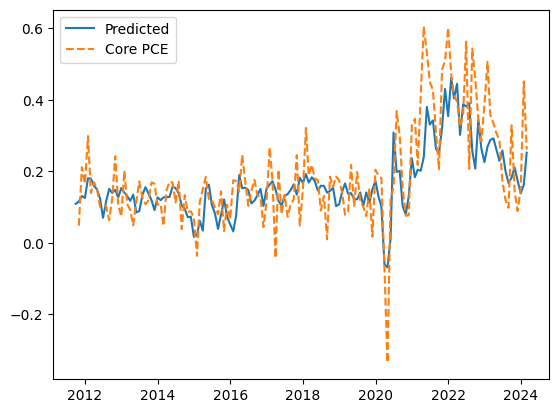

In [772]:
plt.plot(preds_dfs[0].index[-cutoff:], preds_dfs[0][var_name][-cutoff:], label='Predicted')
plt.plot(data.index[-cutoff:], data[var_name][-cutoff:], label=var_name, linestyle='--')
plt.legend()
plt.show()

In [773]:
errors_df[missing_vars]

,Unemployment,CPI,Core CPI,PCE,Core PCE,ISM Services,NFIB Prices
0,93.270977,0.143744,0.119217,0.107813,0.095102,2.837119,3.224171


In [774]:
def get_r_squared(var_name, pred_df, actual_df):
    r2 = np.round(np.corrcoef(pred_df[var_name], actual_df[var_name])[1][0]**2*100, 1)
    return r2

mse = errors_df[var_name][0]
r2 = get_r_squared(var_name, preds_dfs[0], data[start_point:-1])

print(f"Root Mean Squared Error: {mse}")
print(f"R-Squared : {r2}")

Root Mean Squared Error: 0.09510216276753145
R-Squared : 58.2


#### Naive Forecast

In [775]:
mse = ((((data[-cutoff:-1] - data[-cutoff:-1].shift(1)).dropna()**2).mean())**0.5)[var_name]
r2 = get_r_squared(var_name, data[-cutoff:-1].shift(1).dropna(), data[-cutoff+1:-1])

print(f"Root Mean Squared Error: {mse}")
print(f"R-Squared : {r2}")

Root Mean Squared Error: 0.11859469799712184
R-Squared : 41.8


#### AR(1) Model

In [776]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

def fit_ar1_initial_slice(data, initial_slice):
    """
    Fit AR(1) model to the initial slice of the data.
    
    Parameters:
    data (array-like): The dataset.
    initial_slice (int): The end index of the initial slice of data to fit the model on.
    
    Returns:
    tuple: Fitted values of c (intercept) and phi (coefficient).
    """
    # Prepare the lagged version of the series
    X = data[:initial_slice-1]
    Y = data[1:initial_slice]
    X = add_constant(X)  # Add intercept term
    
    # Fit the model
    model = OLS(Y, X).fit()
    
    return model.params[0], model.params[1]  # Intercept (c) and coefficient (phi)

def predict_ar1(c, phi, X_prev):
    """
    Predict the next value in an AR(1) process.
    
    Parameters:
    c (float): Intercept term from AR(1) model.
    phi (float): Coefficient from AR(1) model.
    X_prev (float): The previous observed value in the series.
    
    Returns:
    float: Predicted next value of the series.
    """
    return c + phi * X_prev

def evaluate_recursive_ar1(data, initial_slice):
    """
    Evaluate the predictive performance of a recursive AR(1) on a dataset.
    
    Parameters:
    data (array-like): The dataset to be used.
    initial_slice (int): The end index of the initial slice of data to fit the model on.
    
    Returns:
    float: Mean Squared Error of the predictions.
    """
    # Fit the AR(1) model on the initial slice
    c, phi = fit_ar1_initial_slice(data, initial_slice)
    
    # Initialize list to store predictions
    predictions = []
    
    # Predict and update step
    for t in range(initial_slice, len(data)):
        X_prev = data[t-1]
        pred = predict_ar1(c, phi, X_prev)
        predictions.append(pred)
    
    # Calculate Mean Squared Error
    mse = np.mean((data[initial_slice:] - predictions)**2)**0.5
    r2 = np.corrcoef(data[initial_slice:], predictions)**2
    return predictions, mse, r2

predictions, mse, r2 = evaluate_recursive_ar1(np.array(data[:-1][var_name]), cutoff)
print(f"Root Mean Squared Error: {mse}")
print(f"R-Squared : {np.round(r2[1][0]*100,1)}")

Root Mean Squared Error: 0.1412441635421083
R-Squared : 41.0


#### Cleveland Fed

In [777]:
file_path = Path("cleveland_fed_nowcast.xlsx")
cleveland_df = pd.read_excel(file_path).set_index('date').dropna().drop_duplicates().reset_index()
cleveland_df = cleveland_df[cleveland_df['date'] < '2024-02-01']

cleveland_df = cleveland_df[cleveland_df['date'].dt.day < 10]

cleveland_df['prev_date'] = cleveland_df['date'].shift(-1)

# Keep only the rows where the month of the date is different from the month of the next date
# Or if it's the last row, as the shift would introduce a NaT (not a time) value
cleveland_df = cleveland_df[(cleveland_df['date'].dt.month != cleveland_df['prev_date'].dt.month) | (cleveland_df['prev_date'].isna())]

cleveland_df['date'] = cleveland_df['date'] + pd.offsets.MonthEnd()
cleveland_df = cleveland_df.drop(columns='prev_date').set_index('date')

cleveland_df = cleveland_df[cleveland_df[var_name] < 1]

In [778]:
cleveland_cutoff = len(cleveland_df)
mse = ((((cleveland_df - data[['CPI', 'Core CPI', 'PCE', 'Core PCE']][data.index >= cleveland_df.index[0]])**2).mean())**0.5)[var_name]
r2 = get_r_squared(var_name, cleveland_df, data[data.index.isin(cleveland_df.index)])


print(f"Root Mean Squared Error: {mse}")
print(f"R-Squared : {r2}")

Root Mean Squared Error: 0.12386897879198311
R-Squared : 33.6


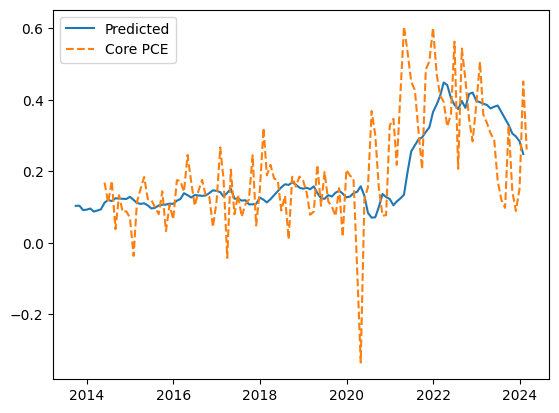

In [779]:
plt.plot(cleveland_df.index, cleveland_df[var_name], label='Predicted')
plt.plot(data.index[-cleveland_cutoff:], data[var_name][-cleveland_cutoff:], label=var_name, linestyle='--')
plt.legend()
plt.show()

In [780]:
## Post CPI Release
cleveland_df = pd.read_excel(file_path).set_index('date').dropna().drop_duplicates().reset_index()
cleveland_df = cleveland_df[cleveland_df['date'] < '2024-02-01']

cleveland_df = cleveland_df[cleveland_df['date'].dt.day > 20]

cleveland_df = cleveland_df[cleveland_df['date'].dt.dayofweek.isin([3, 4, 5])]

cleveland_df['prev_date'] = cleveland_df['date'].shift(-1)

# Keep only the rows where the month of the date is different from the month of the next date
# Or if it's the last row, as the shift would introduce a NaT (not a time) value
cleveland_df = cleveland_df[(cleveland_df['date'].dt.month != cleveland_df['prev_date'].dt.month) | (cleveland_df['prev_date'].isna())]

cleveland_df['date'] = cleveland_df['date'] -timedelta(days=1) + pd.offsets.MonthEnd()

cleveland_df = cleveland_df.drop(columns='prev_date').set_index('date')

In [781]:
cleveland_df = cleveland_df[cleveland_df[var_name] < 1]

In [782]:
cleveland_cutoff = len(cleveland_df)
mse = ((((cleveland_df - data[['CPI', 'Core CPI', 'PCE', 'Core PCE']][data.index >= cleveland_df.index[0]])**2).mean())**0.5)[var_name]
r2 = get_r_squared(var_name, cleveland_df, data[data.index.isin(cleveland_df.index)])

print(f"Root Mean Squared Error: {mse}")
print(f"R-Squared : {r2}")

Root Mean Squared Error: 0.13609695131625787
R-Squared : 38.1


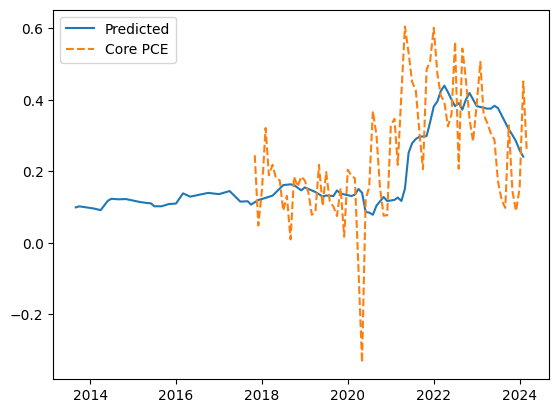

In [783]:
plt.plot(cleveland_df.index, cleveland_df[var_name], label='Predicted')
plt.plot(data.index[-cleveland_cutoff:], data[var_name][-cleveland_cutoff:], label=var_name, linestyle='--')
plt.legend()
plt.show()

In [784]:
## VS Model Forecasts for Same Time Window

mse = ((((preds_dfs[0][['CPI', 'Core CPI', 'PCE', 'Core PCE']][-cleveland_cutoff:] - data[['CPI', 'Core CPI', 'PCE', 'Core PCE']][-cleveland_cutoff:-1]).dropna()**2).mean())**0.5)[var_name]
r2 = get_r_squared(var_name, preds_dfs[0], data[start_point:-1])

print(f"Root Mean Squared Error: {mse}")
print(f"R-Squared : {r2}")

Root Mean Squared Error: 0.11924191034476056
R-Squared : 58.2
